In [1]:
lista = (1)
dic = dict()
dic[lista] = 1

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


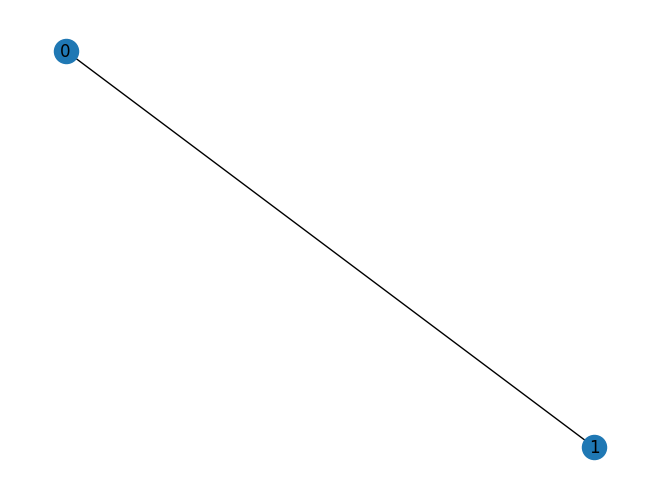

In [2]:
from quantumnet.components import Controller, Network, Host
rede = Network()
controlador = Controller(rede)
rede.set_ready_topology("Linha", 2)
rede.draw()

As decisões são objetos com o método verify que retorna True ou False, dependendo da request recebida. O controlador tem um dicionário cujas chaves são os métodos verify das decisões e os valores são as ações que serão tomadas. 

In [3]:
alice = 1
bob = 0
fmin = 1
eprs = 2
request = [alice, bob, fmin, eprs]
actions = controlador.apply_decision(request)

Aplicando decisão do controlador para a request [1, 0, 1, 2]
Decisões: ['Se o destino for 0']
Decisão aplicada: (<quantumnet.objects.decision.decisionX.Decision_X object at 0x000002339CAC0D10>,)
Ações que devem ser executadas: [<class 'quantumnet.objects.action.create_epr_action.CreateEPRAction'>, <class 'quantumnet.objects.action.swap_action.SwapAction'>, <class 'quantumnet.objects.action.purification_action.PurificationAction'>]


In [4]:
print(type(actions[0]))
host0 = rede.get_host(0)
host0.find_roule_by_request(request)

<class 'type'>
Estou procurando um match para a request [1, 0, 1, 2]


'Descartar. Origem igual ao destino.'